In [ ]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set width and height
plt.rcParams["figure.figsize"] = (14.0, 8.0)

CSV_URL = "https://www.kiel.de/de/kiel_zukunft/statistik_kieler_zahlen/open_data/kiel_soziales_sozialhilfeaufwendungen.csv"


In [23]:
# Fetch data
csv_data = requests.get(CSV_URL).content

# Read data
df = pd.read_csv(io.StringIO(csv_data.decode("utf-8")), sep=";")
print(df.head(3))


    Land Stadt Kategorie                          Merkmal  Jahr  \
0  de-sh  Kiel  soziales  Sozialhilfeaufwendungen in Euro  2010   
1  de-sh  Kiel  soziales  Sozialhilfeaufwendungen in Euro  2011   
2  de-sh  Kiel  soziales  Sozialhilfeaufwendungen in Euro  2012   

   Lebensunterhalt  Grundsicherung  Gesundheit  Eingliederung    Pflege  \
0         12852800        26543500     5087800       56075900  16942500   
1         12876400        28751000     4134900       58047200  16936700   
2         13184700        30875500     4451700       59889700  17359000   

   Soziale Schwierigkeiten  
0                   797100  
1                  1036500  
2                   994200  


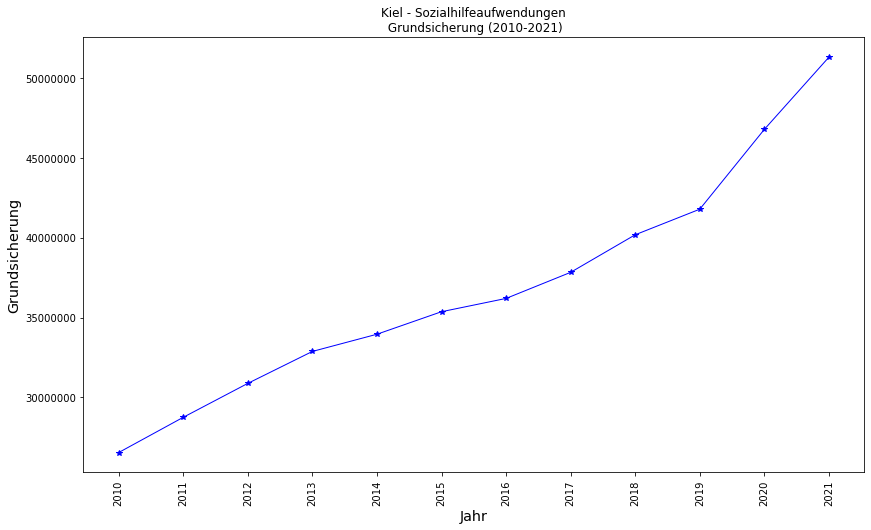

In [24]:
# Create a subplot
fig, ax = plt.subplots()

# Drop NA values
df_cleaned = df.dropna(how="all")

# Unsigned integer
df_years = df_cleaned["Jahr"].astype(np.uint16)

x = df_years.values
y = df_cleaned["Grundsicherung"].values

# Set title and x/y label
plt.title("Kiel - Sozialhilfeaufwendungen\n Grundsicherung (2010-2021)")
plt.ylabel("Grundsicherung", size="x-large")
plt.xlabel("Jahr", size="x-large")

# Repress scientific notation (y-axis)
plt.ticklabel_format(style='plain', axis='y')

# Plot data
plt.plot(y, "*-", markersize=6, linewidth=1, color="b")

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()
